Arthur Oliveira – rm89187

Gabriel Bega – rm87442

Gabriel Pionte – rm84539

Gustavo Tachira – rm88197

Gustavo Martins -- rm87101

Laura Giancoli – rm87194

Matheus Lambert – rm87079

Nickolas Pereira - rm88103

In [1]:
import pandas as pd
from sklearn.datasets import fetch_openml
dados = fetch_openml(data_id=43039)
dados

{'data':        Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
 0          57222.0              53.0          54587.0                  53.0   
 1          56258.0            3389.0          56258.0                3389.0   
 2           6881.0           50321.0          43265.0               50321.0   
 3          50553.0            3389.0          50553.0                3389.0   
 4          50002.0             443.0          45848.0                 443.0   
 ...            ...               ...              ...                   ...   
 65527      63691.0              80.0          13237.0                  80.0   
 65528      50964.0              80.0          13485.0                  80.0   
 65529      54871.0             445.0              0.0                   0.0   
 65530      54870.0             445.0              0.0                   0.0   
 65531      54867.0             445.0              0.0                   0.0   
 
       Action      Bytes  Byte

In [3]:
df_dados = pd.DataFrame(data = dados.data, columns=dados.feature_names)
df_dados.head()
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Source Port           65532 non-null  float64
 1   Destination Port      65532 non-null  float64
 2   NAT Source Port       65532 non-null  float64
 3   NAT Destination Port  65532 non-null  float64
 4   Action                65532 non-null  object 
 5   Bytes                 65532 non-null  float64
 6   Bytes Sent            65532 non-null  float64
 7   Bytes Received        65532 non-null  float64
 8   Packets               65532 non-null  float64
 9   Elapsed Time (sec)    65532 non-null  float64
 10  pkts_sent             65532 non-null  float64
 11  pkts_received         65532 non-null  float64
dtypes: float64(11), object(1)
memory usage: 6.0+ MB


In [33]:
df_dados.groupby('Action').max()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
Action,,,,,,,,,,,
allow,65534.0,65535.0,65535.0,65535.0,1.269359e+09,948477220.0,320881795.0,1036116.0,10824.0,747520.0,327208.0
deny,65529.0,65504.0,62347.0,8889.0,1.850000e+03,1514.0,1419.0,5.0,1.0,3.0,2.0
drop,65533.0,445.0,0.0,0.0,7.000000e+01,70.0,0.0,1.0,0.0,1.0,0.0
reset-both,64461.0,61248.0,64014.0,3389.0,2.930000e+02,223.0,70.0,4.0,1.0,3.0,1.0


In [15]:
import seaborn as sns

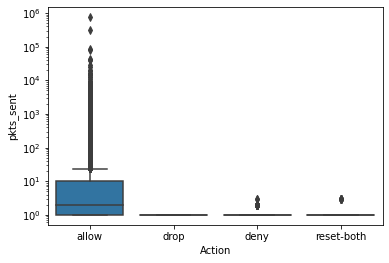

In [22]:
ax=sns.boxplot(y="pkts_sent",x="Action",data=df_dados)
ax.set_yscale("log")

(0.0, 500.0)

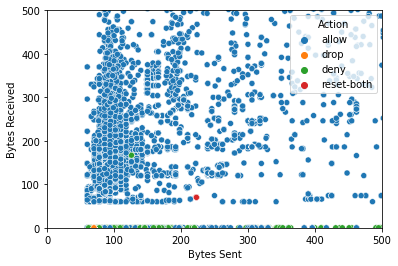

In [34]:
ax=sns.scatterplot(x="Bytes Sent",y="Bytes Received",data=df_dados, hue="Action")
ax.set_xlim([0,500])
ax.set_ylim([0,500])

In [4]:
from sklearn.model_selection import train_test_split
x = df_dados.drop(columns = ['Packets','Action']) # Colunas descritivas
y = df_dados['Action']                # Valor alvo

# Dividindo conjunto de treinamento e conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify=y)

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler # Importando o Escalonador
scaler = MinMaxScaler()
#Treinando o escalonador

scaler.fit(x_train)
# Usando o escalonador treinado para transformar os dados
x_train_scaled = scaler.transform(x_train)

x_test_scaled = scaler.transform(x_test)

In [6]:
#Classificador Random Forest 
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(x_train_scaled, y_train)

RandomForestClassifier(random_state=0)

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix,classification_report
from sklearn.metrics import cohen_kappa_score, roc_auc_score, roc_curve
# Perceba que estamos passando apenas o x de teste, afinal o algoritmo é que nos dira qual é o y 
y_predicoes = clf.predict(x_test_scaled)

<Figure size 1080x360 with 0 Axes>

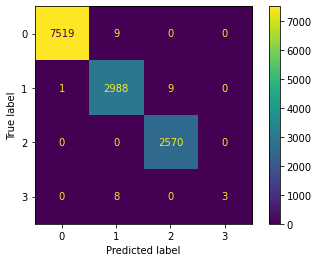

In [8]:
import matplotlib.pyplot as plt  
import seaborn as sns
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_predicoes)
# plotando uma figura com a matriz de confusao
figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao)
disp.plot(values_format='d') 

In [9]:
# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predicoes))

              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7528
        deny       0.99      1.00      1.00      2998
        drop       1.00      1.00      1.00      2570
  reset-both       1.00      0.27      0.43        11

    accuracy                           1.00     13107
   macro avg       1.00      0.82      0.86     13107
weighted avg       1.00      1.00      1.00     13107

